# Exploratory Data Analysis Portfolio: Titanic - Machine Learning from Disaster

## Summary and Objectives
The **primary objective** of this analysis is to perform a rigorous exploratory data analysis (EDA) on the Titanic dataset to identify the socio-economic and demographic features that statistically influenced survival rates. By interrogating the relationships between passenger attributes, specifically Sex, Age, Socio-economic Class (Pclass), and Fare, this study aims to isolate the key drivers of survival to inform future predictive modeling.

## Hypotheses
This analysis is structured around testing the following three hypotheses:

1. Gender and Age Advocacy: Based on historical "Women and Children First" protocols, female passengers and minors (Age < 18) will exhibit significantly higher survival probabilities compared to adult males.

2. Socio-Economic classification: Survival rates will show a positive correlation with ticket class (Pclass) and ticket price (Fare), suggesting that proximity to lifeboats and social status influenced evacuation priority.

3. Feature Interaction: The impact of age on survival will vary significantly when controlled for Passenger Class, indicating that demographic advantages were secondary to economic status.

## Imports

In [1208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("train.csv")
print(f"This dataset has {dataset.shape[0]} rows(people) and {dataset.shape[1]} columns(attributes)")

This dataset has 891 rows(people) and 12 columns(attributes)


## Data Cleaning

### Missing Data

In [1209]:
print(dataset.isnull().sum())
"""
Out of 891 entries:

Age is missing 177 entries
Cabin is missing 687 entries
Embarked is missing 2 entries
"""

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


'\nOut of 891 entries:\n\nAge is missing 177 entries\nCabin is missing 687 entries\nEmbarked is missing 2 entries\n'

### Relating Ages to Pclass

Pclass 1
Mean = 38.233440860215055
Median = 37.0

Pclass 2
Mean = 29.87763005780347
Median = 29.0

Pclass 3
Mean = 25.14061971830986
Median = 24.0


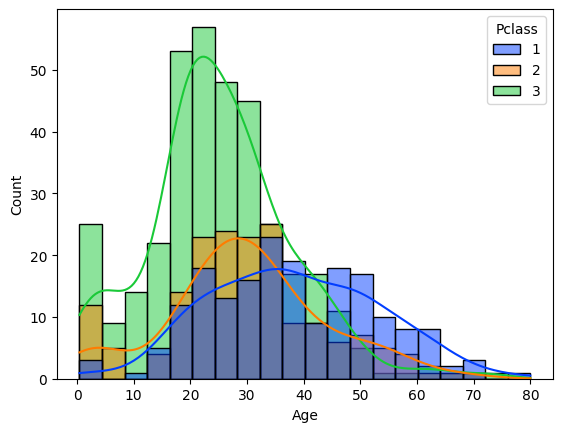

In [1210]:
# Distribution of ages per Pclass
sns.histplot(
    data=dataset,
    kde=True,
    hue="Pclass",
    x="Age",
    palette="bright"
)

# Printing means and medians of ages per Pclass
p1 = dataset[dataset["Pclass"] == 1]["Age"]
p2 = dataset[dataset["Pclass"] == 2]["Age"]
p3 = dataset[dataset["Pclass"] == 3]["Age"]

print(f"Pclass 1\nMean = {p1.mean()}\nMedian = {p1.median()}\n")
print(f"Pclass 2\nMean = {p2.mean()}\nMedian = {p2.median()}\n")
print(f"Pclass 3\nMean = {p3.mean()}\nMedian = {p3.median()}")

plt.show()

The age distribution across socio-economic classes reveals a clear classification: passengers in Pclass 1 are significantly older than those in lower classes. Specifically, the median age decreases from 37 in Pclass 1 to 29 in Pclass 2, and 24 in Pclass 3, a spread of 8 and 13 years respectively. Within each class, the central tendencies (mean and median) are nearly identical, suggesting a relatively symmetric distribution within these sub-groups. This lack of significant skewness justifies the use of class-specific medians for missing value imputation.

### Relating Age to Title(Mr, Mrs, Miss, etc.)

Mr
Mean = 32.368090452261306
Median = 30.0

Mrs
Mean = 35.788990825688074
Median = 35.0

Miss
Mean = 21.845637583892618
Median = 21.0

Master
Mean = 4.574166666666667
Median = 3.5

Other
Mean = 45.54545454545455
Median = 48.5


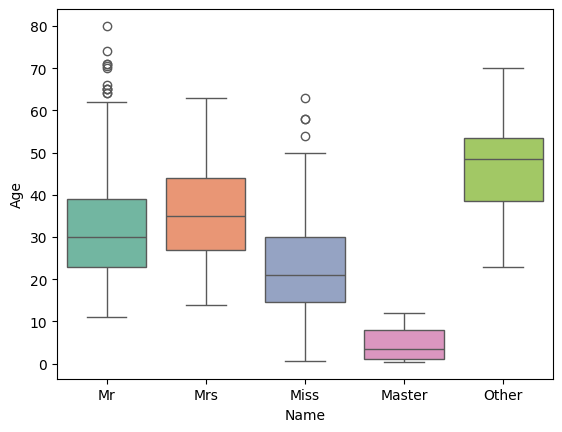

In [1211]:
# Replace names with titles (Mr, Mrs, etc.)
dataset["Name"] = dataset["Name"].str.extract(r', ([A-Za-z ]+)\.', expand=False)

# Simplify the titles
dataset['Name'] = dataset['Name'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'the Countess'], 'Other')
dataset['Name'] = dataset['Name'].replace('Mlle', 'Miss')
dataset['Name'] = dataset['Name'].replace('Ms', 'Miss')
dataset['Name'] = dataset['Name'].replace('Mme', 'Mrs')

sns.boxplot(data=dataset, x='Name', y='Age', hue='Name', palette='Set2', legend=False)

# Get mean and median from ages by title
mr = dataset[dataset["Name"] == "Mr"]["Age"]
mrs = dataset[dataset["Name"] == "Mrs"]["Age"]
miss = dataset[dataset["Name"] == "Miss"]["Age"]
master = dataset[dataset["Name"] == "Master"]["Age"]
other = dataset[dataset["Name"] == "Other"]["Age"]

print(f"Mr\nMean = {mr.mean()}\nMedian = {mr.median()}\n")
print(f"Mrs\nMean = {mrs.mean()}\nMedian = {mrs.median()}\n")
print(f"Miss\nMean = {miss.mean()}\nMedian = {miss.median()}\n")
print(f"Master\nMean = {master.mean()}\nMedian = {master.median()}\n")
print(f"Other\nMean = {other.mean()}\nMedian = {other.median()}")

plt.show()

The age distributions for 'Mr' and 'Mrs' are relatively homogeneous, with similar central tendencies and interquartile ranges. In contrast, 'Miss' skewed significantly younger, likely reflecting a mix of children and unmarried young adults. 'Master' emerged as a distinct demographic group, consistently identifying male children. The 'Other' category exhibited high variance, representing a broad spectrum of ages among specialized titles.

### Adjust Family Metric

In [1212]:
# Changing SibSp and Parch to just 1 column called family size
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

dataset = dataset.drop(columns=["SibSp", "Parch"])

### Filling Missing Data (Age, Cabin, Embarked)

I utilized a multi-layered imputation strategy. For 'Age', I used grouped medians based on Pclass and Title to preserve demographic nuances. For the 'Cabin' feature, due to the high percentage of missingness, I performed feature extraction to isolate the 'Deck' and categorized missing values as 'Unknown'. This transformed a messy, sparse column into a categorical feature that may correlate with survival priority.

In [1213]:
# Filling missing ages with the median of their Pclass and Title group
dataset['Age'] = dataset['Age'].fillna(dataset.groupby(['Pclass', 'Name'])['Age'].transform('median'))

# Generalize cabin to 1st letter deck
dataset['Deck'] = dataset['Cabin'].str.get(0)
dataset['Deck'] = dataset['Deck'].fillna('U') # Unknowns get a U (Unknown)
dataset = dataset.drop(columns=['Cabin']) # Drop Cabin column

# Find the most common port
mode_port = dataset['Embarked'].mode()[0]
dataset['Embarked'] = dataset['Embarked'].fillna(mode_port)

# No more missing data
print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Deck           0
dtype: int64


## Survival Analysis

### Family Size

<Axes: xlabel='FamilySize', ylabel='Survived'>

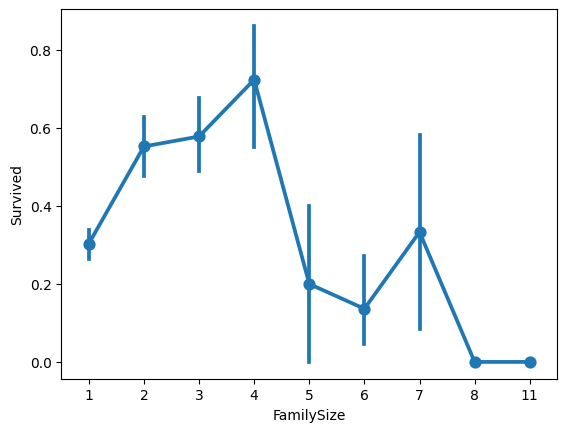

In [1214]:
# Percent of family sizes that survied
sns.pointplot(
    data=dataset,
    x="FamilySize",
    y="Survived",
)

### Fare vs Survival

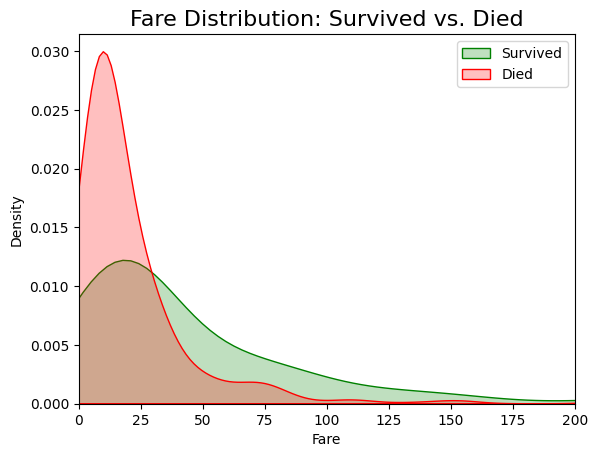

In [1215]:
sns.kdeplot(
    data=dataset[dataset['Survived'] == 1]['Fare'],
    fill=True,
    label='Survived',
    color='green'
)

sns.kdeplot(
    data=dataset[dataset['Survived'] == 0]['Fare'],
    fill=True,
    label='Died',
    color='red'
)

# Since some fares are huge, we limit the x-axis to see the detail
plt.xlim(0, 200) 
plt.title("Fare Distribution: Survived vs. Died", fontsize=16)
plt.legend()
plt.show()

### Embarked - Port of Origin vs Pclass

S Survival Rate = 34%
S Fare = 27

Q Survival Rate = 39%
S Fare = 13

C Survival Rate = 55%
S Fare = 60



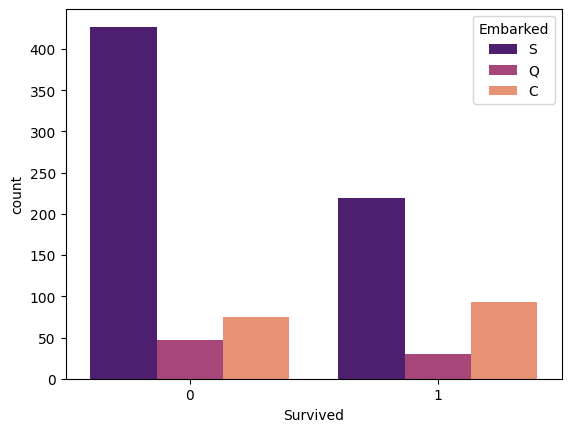

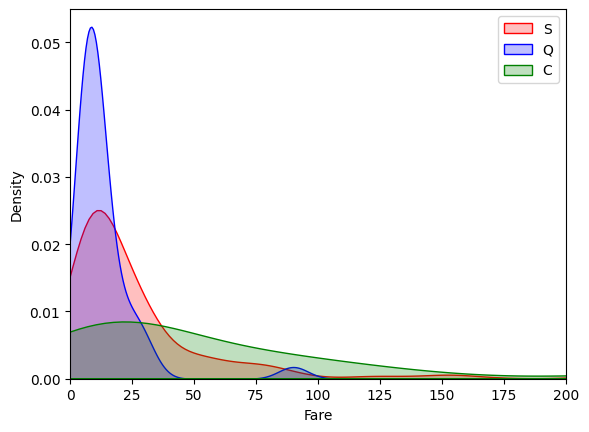

In [ ]:
# Distribution of ages per Pclass

print(f"S Survival Rate = {dataset[dataset["Embarked"] == "S"]["Survived"].mean() * 100:.0f}%")
print(f"S Fare = {dataset[dataset["Embarked"] == "S"]["Fare"].mean():.0f}")
print()

print(f"Q Survival Rate = {dataset[dataset["Embarked"] == "Q"]["Survived"].mean() * 100:.0f}%")
print(f"S Fare = {dataset[dataset["Embarked"] == "Q"]["Fare"].mean():.0f}")
print()

print(f"C Survival Rate = {dataset[dataset["Embarked"] == "C"]["Survived"].mean() * 100:.0f}%")
print(f"S Fare = {dataset[dataset["Embarked"] == "C"]["Fare"].mean():.0f}")
print()

sns.countplot(
    data=dataset,
    hue="Embarked",
    x="Survived",
    palette="magma"
)
plt.show()

sns.kdeplot(
    data=dataset[dataset['Embarked'] == "S"]['Fare'],
    fill=True,
    label='S',
    color='red'
)
sns.kdeplot(
    data=dataset[dataset['Embarked'] == "Q"]['Fare'],
    fill=True,
    label='Q',
    color='blue'
)
sns.kdeplot(
    data=dataset[dataset['Embarked'] == "C"]['Fare'],
    fill=True,
    label='C',
    color='green'
)
plt.xlim(0, 200)
plt.legend()
plt.show()

### Heatmaps

## Final Summary and Analysis